In [1]:
import numpy as np
import pandas as pd
import glob
import os
from plotnine import *

In [2]:
path = r'D:\Summer Practicum\1_Data\On_Time_Marketing_Carrier_On_Time_Performance_Beginning_January_2018_2023_All_Months'
all_files = glob.glob(os.path.join(path,'*.csv'))

# Read all files in the Data folder
df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)

C:\Users\bmhawley\AppData\Local\Temp\5\ipykernel_30564\2200835650.py:5: DtypeWarning: Columns (11,13,86,93) have mixed types. Specify dtype option on import or set low_memory=False.
C:\Users\bmhawley\AppData\Local\Temp\5\ipykernel_30564\2200835650.py:5: DtypeWarning: Columns (11,13,85,86,93) have mixed types. Specify dtype option on import or set low_memory=False.
C:\Users\bmhawley\AppData\Local\Temp\5\ipykernel_30564\2200835650.py:5: DtypeWarning: Columns (11,13,57,78,85,86,93) have mixed types. Specify dtype option on import or set low_memory=False.
C:\Users\bmhawley\AppData\Local\Temp\5\ipykernel_30564\2200835650.py:5: DtypeWarning: Columns (11,13,86,93) have mixed types. Specify dtype option on import or set low_memory=False.
C:\Users\bmhawley\AppData\Local\Temp\5\ipykernel_30564\2200835650.py:5: DtypeWarning: Columns (11,13,86,93) have mixed types. Specify dtype option on import or set low_memory=False.
C:\Users\bmhawley\AppData\Local\Temp\5\ipykernel_30564\2200835650.py:5: DtypeW

In [4]:
print(df.shape)
df.info()

(7065617, 120)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7065617 entries, 0 to 7065616
Columns: 120 entries, Year to Unnamed: 119
dtypes: float64(73), int64(22), object(25)
memory usage: 6.3+ GB


   Month  DepDelayMinutes
0      1        16.299005
1      2        13.616579
2      3        15.911624
3      4        16.052765
4      5        15.253399


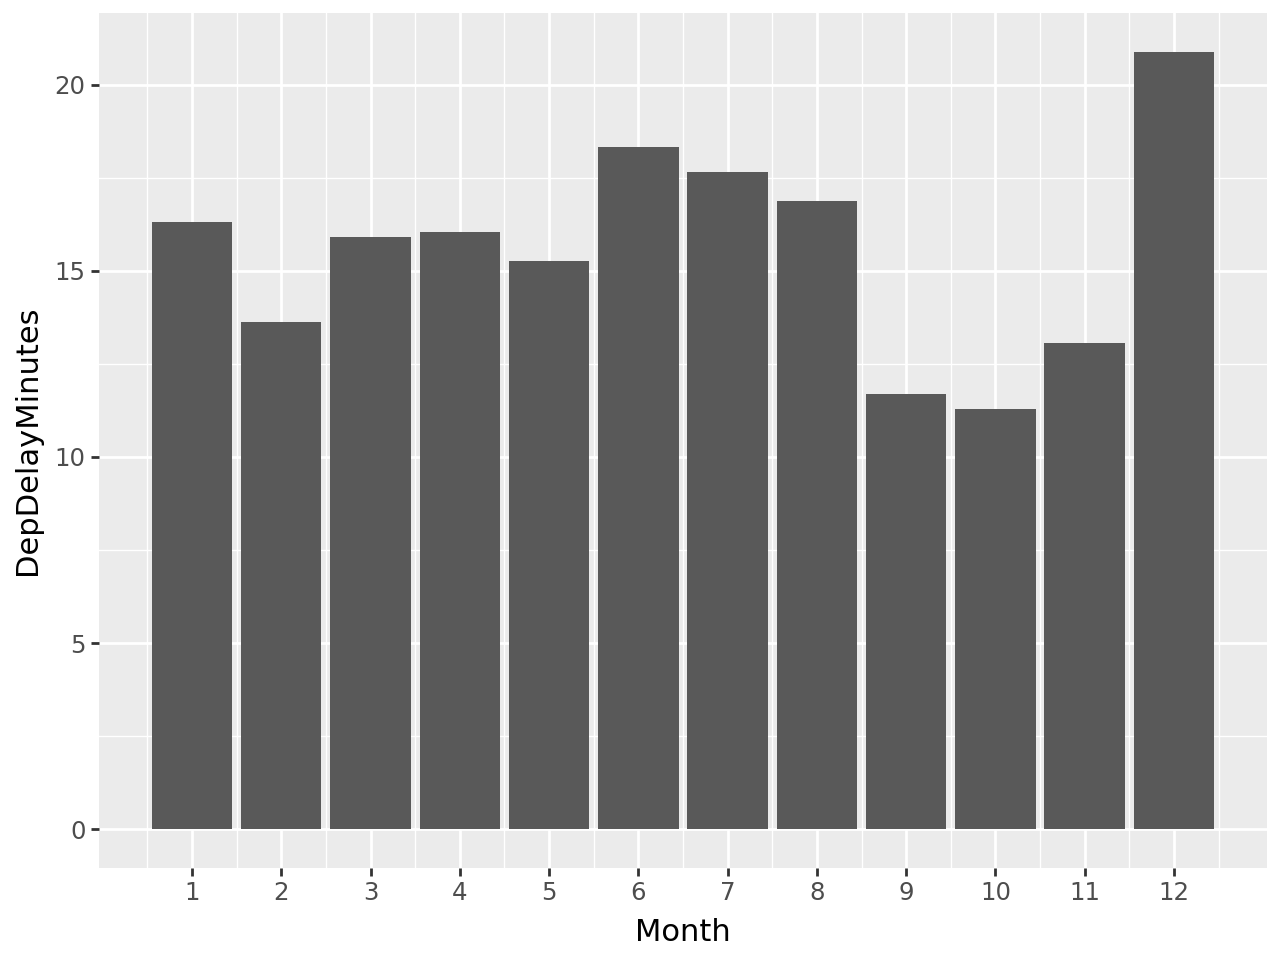

In [8]:
#average delay by month
avg_month_delay = df.groupby("Month")["DepDelayMinutes"].mean().reset_index()
print(avg_month_delay.head())

ggplot(avg_month_delay, aes(x = 'Month', y = 'DepDelayMinutes')) + geom_line() + geom_point() + scale_x_continuous(breaks = np.arange(1, 13, 1))
ggplot(avg_month_delay, aes(x = 'Month', y = 'DepDelayMinutes')) + geom_col() + scale_x_continuous(breaks = np.arange(1, 13, 1))

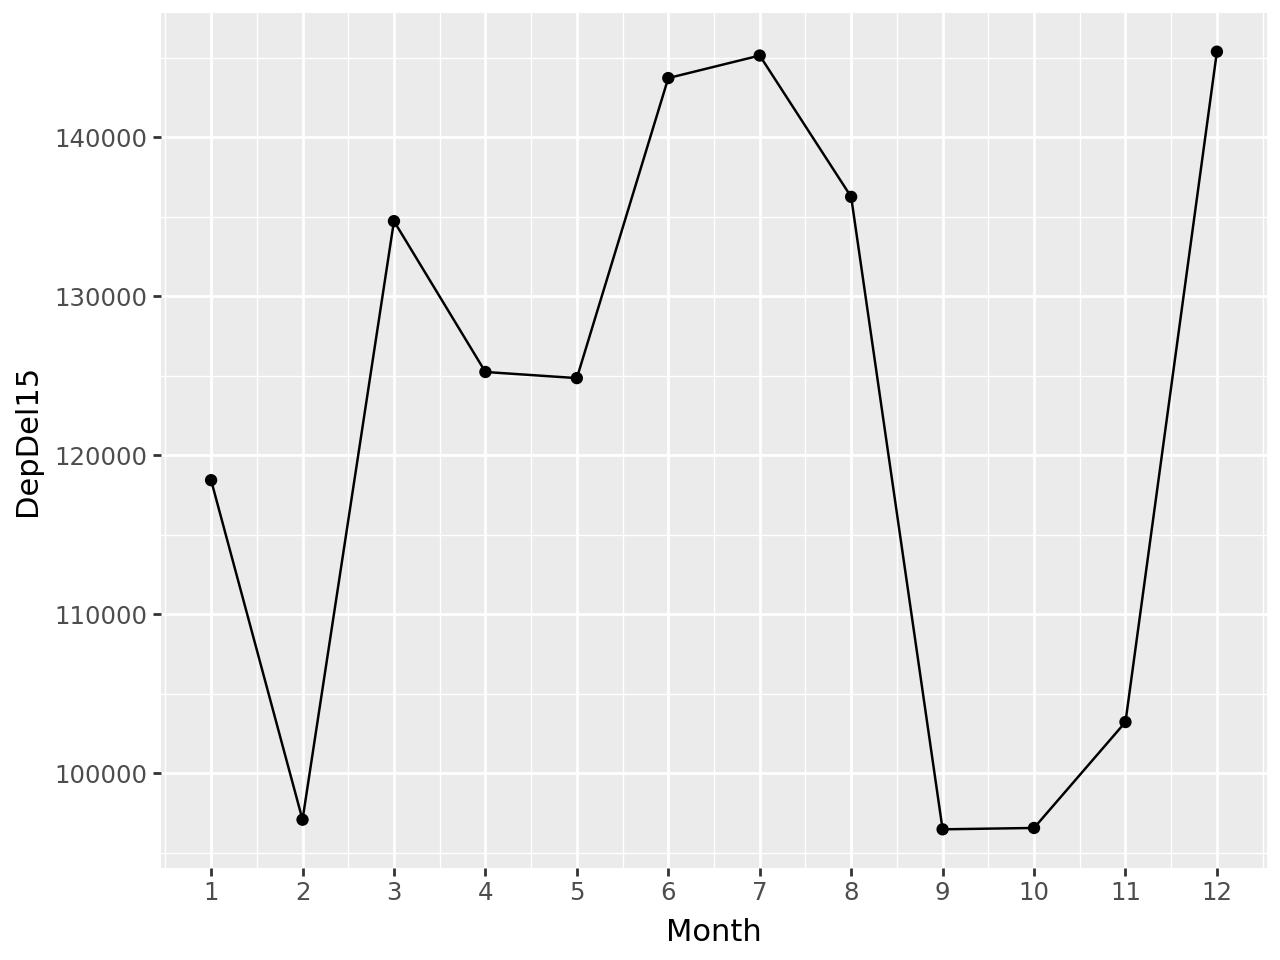

In [5]:
#total number of delayed flights (>15mins) per month
total_month_delay = df.groupby("Month")["DepDel15"].sum().reset_index()

ggplot(total_month_delay, aes(x = 'Month', y = 'DepDel15')) + geom_line() + geom_point() + scale_x_continuous(breaks = np.arange(1, 13, 1))

    Month  PCT Delayed
0       1    20.636129
1       2    18.103087
2       3    21.861014
3       4    21.580589
4       5    20.705531
5       6    23.870165
6       7    23.453676
7       8    22.201943
8       9    16.621553
9      10    16.219122
10     11    18.187617
11     12    25.136732


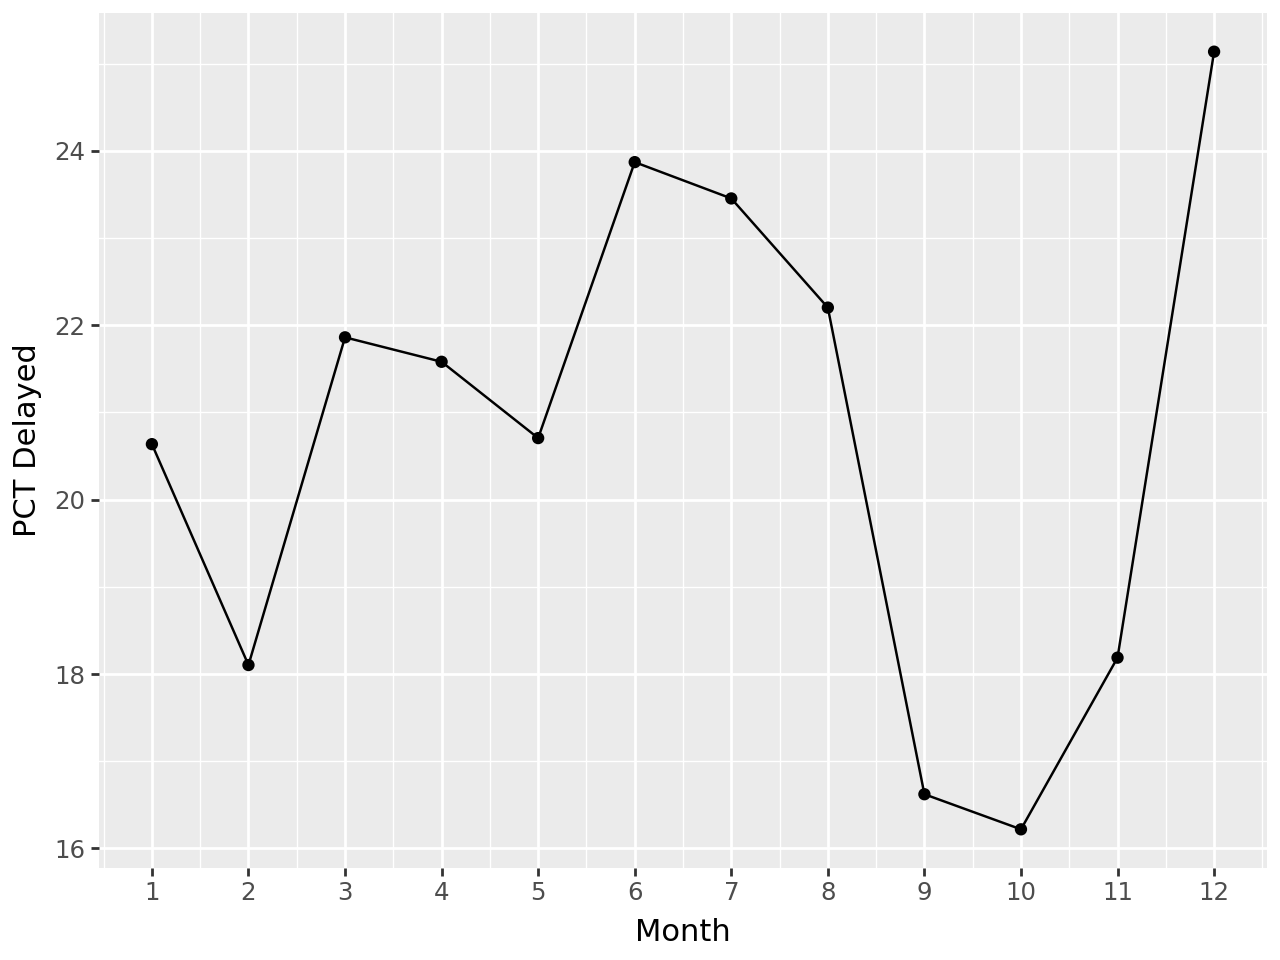

In [24]:
#percentage of flights that were delayed per month

delayed_flights = df[df["DepDel15"]==1]
delayed_by_month = delayed_flights["Month"].value_counts().sort_index()
num_total_flights = df.groupby("Month")
total_by_month = num_total_flights["Month"].value_counts().sort_index()
percent_delayed = delayed_by_month / total_by_month * 100
percent_delayed = percent_delayed.reset_index()
percent_delayed.columns=['Month', 'PCT Delayed']
print(percent_delayed)

ggplot(percent_delayed, aes(x = 'Month', y = 'PCT Delayed')) + geom_line() + geom_point() + scale_x_continuous(breaks = np.arange(1, 13, 1))

   Month  DepartureDelayGroups
0      1              0.200417
1      2              0.017727
2      3              0.201934
3      4              0.228055
4      5              0.171195


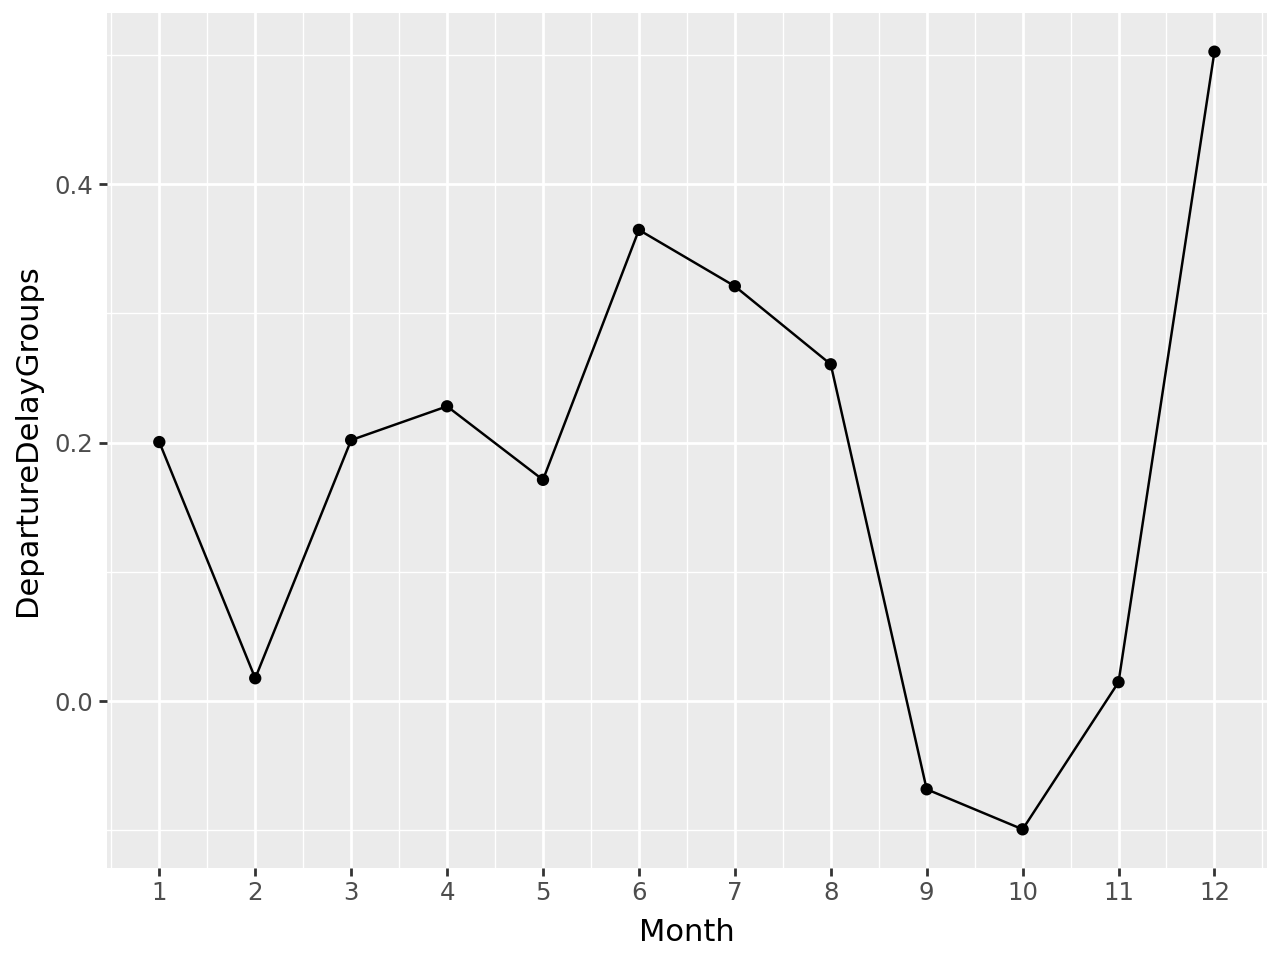

In [6]:
#average of delay groups
avg_delay_groups = df.groupby("Month")["DepartureDelayGroups"].mean().reset_index()
print(avg_delay_groups.head())

ggplot(avg_delay_groups, aes(x = 'Month', y = 'DepartureDelayGroups')) + geom_line() + geom_point() + scale_x_continuous(breaks = np.arange(1, 13, 1))

   Month  DepartureDelayGroups
0      1              0.200417
1      2              0.017727
2      3              0.201934
3      4              0.228055
4      5              0.171195


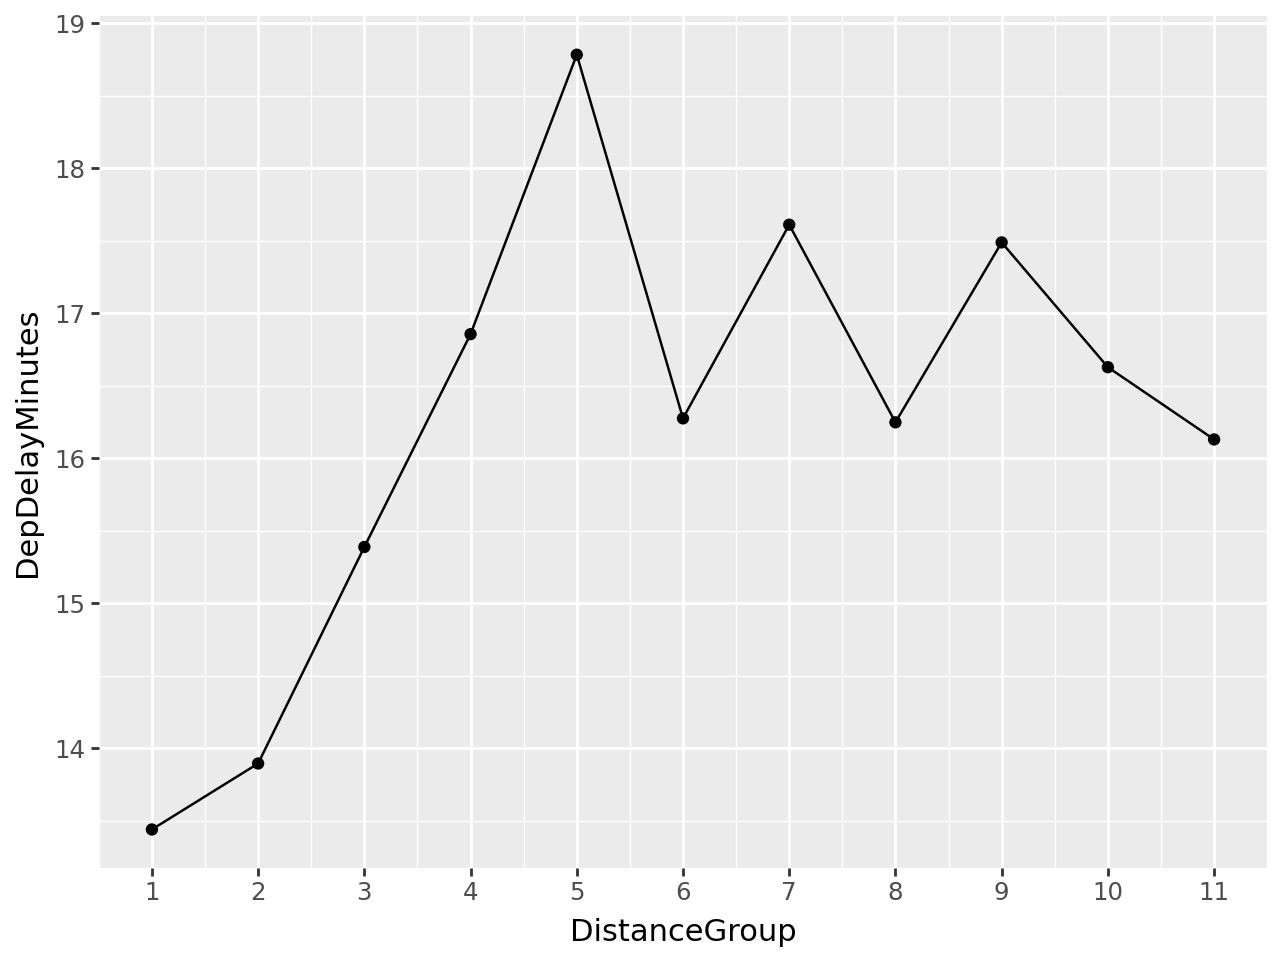

In [25]:
#average delay by distance group
avg_delay_by_dist = df.groupby("DistanceGroup")["DepDelayMinutes"].mean().reset_index()
print(avg_delay_groups.head())

ggplot(avg_delay_by_dist, aes(x = 'DistanceGroup', y = 'DepDelayMinutes')) + geom_line() + geom_point() + scale_x_continuous(breaks = np.arange(1, 13, 1))

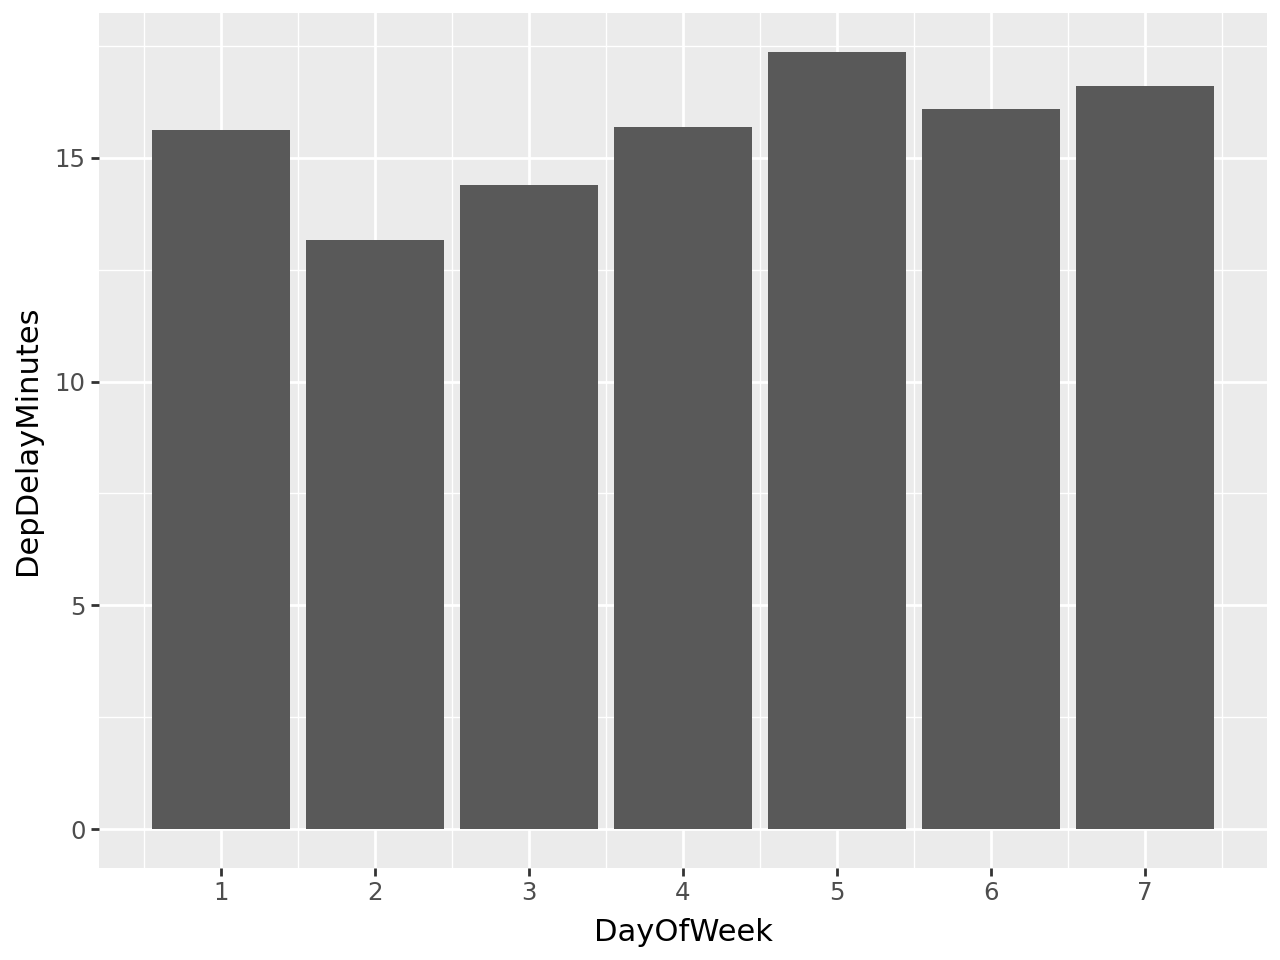

In [29]:
#average delay by day of week
avg_delay_by_day = df.groupby("DayOfWeek")["DepDelayMinutes"].mean().reset_index()

ggplot(avg_delay_by_day, aes(x = 'DayOfWeek', y = 'DepDelayMinutes')) + geom_col() + scale_x_continuous(breaks = np.arange(1, 13, 1))

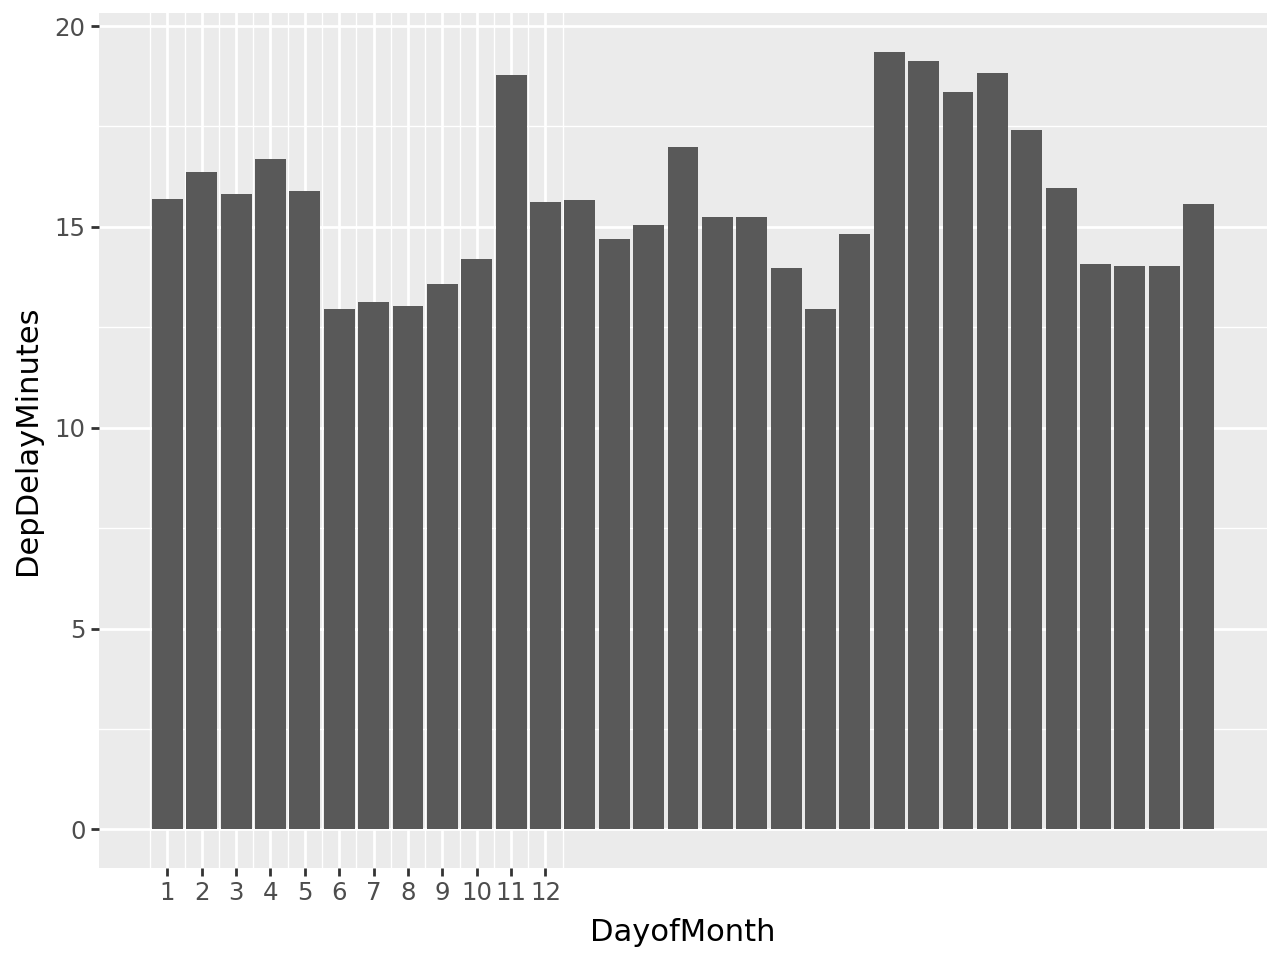

In [31]:
#average delay by day of month
avg_delay_by_month_day = df.groupby("DayofMonth")["DepDelayMinutes"].mean().reset_index()

ggplot(avg_delay_by_month_day, aes(x = 'DayofMonth', y = 'DepDelayMinutes')) + geom_col() + scale_x_continuous(breaks = np.arange(1, 13, 1))

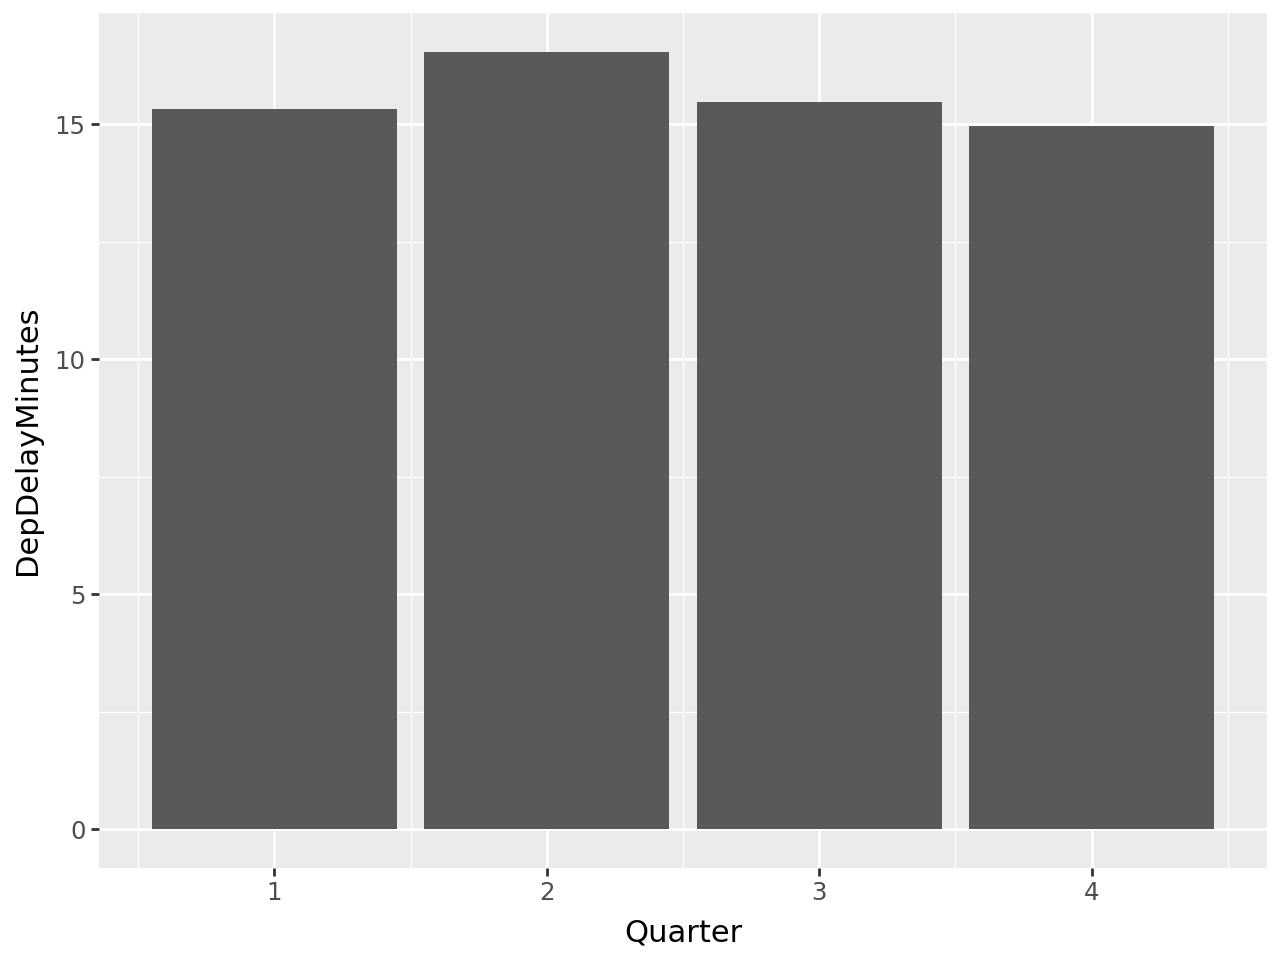

In [32]:
#average delay by quarter
avg_delay_by_quarter = df.groupby("Quarter")["DepDelayMinutes"].mean().reset_index()

ggplot(avg_delay_by_quarter, aes(x = 'Quarter', y = 'DepDelayMinutes')) + geom_col() + scale_x_continuous(breaks = np.arange(1, 13, 1))

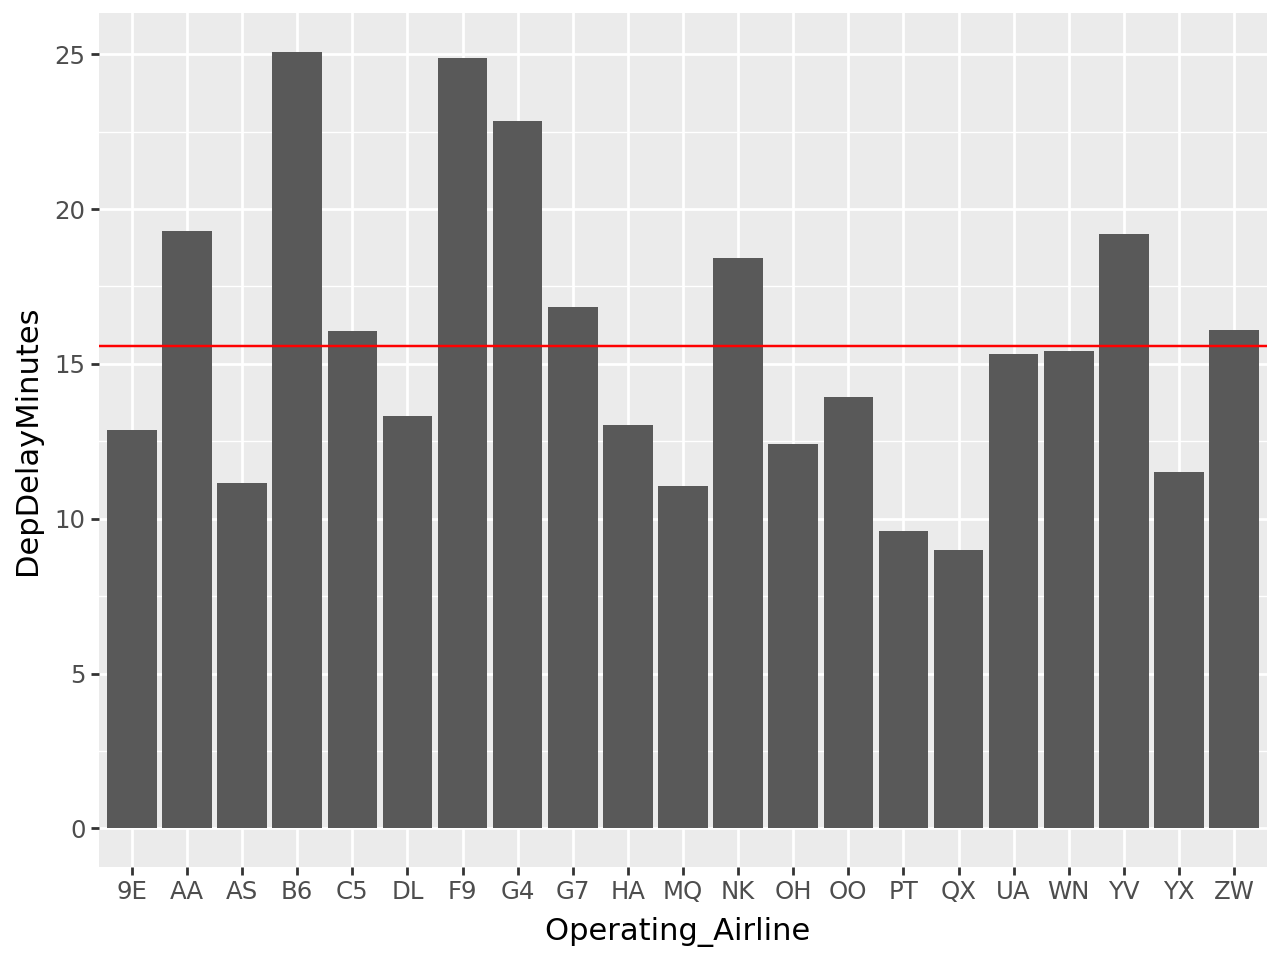

In [ ]:
#average delay by operating airline
avg_delay_by_airline = df.groupby("Operating_Airline ")["DepDelayMinutes"].mean().reset_index()

ggplot(avg_delay_by_airline, aes(x = 'Operating_Airline ', y = 'DepDelayMinutes')) + geom_col() + geom_hline(yintercept=15.59, color="Red")

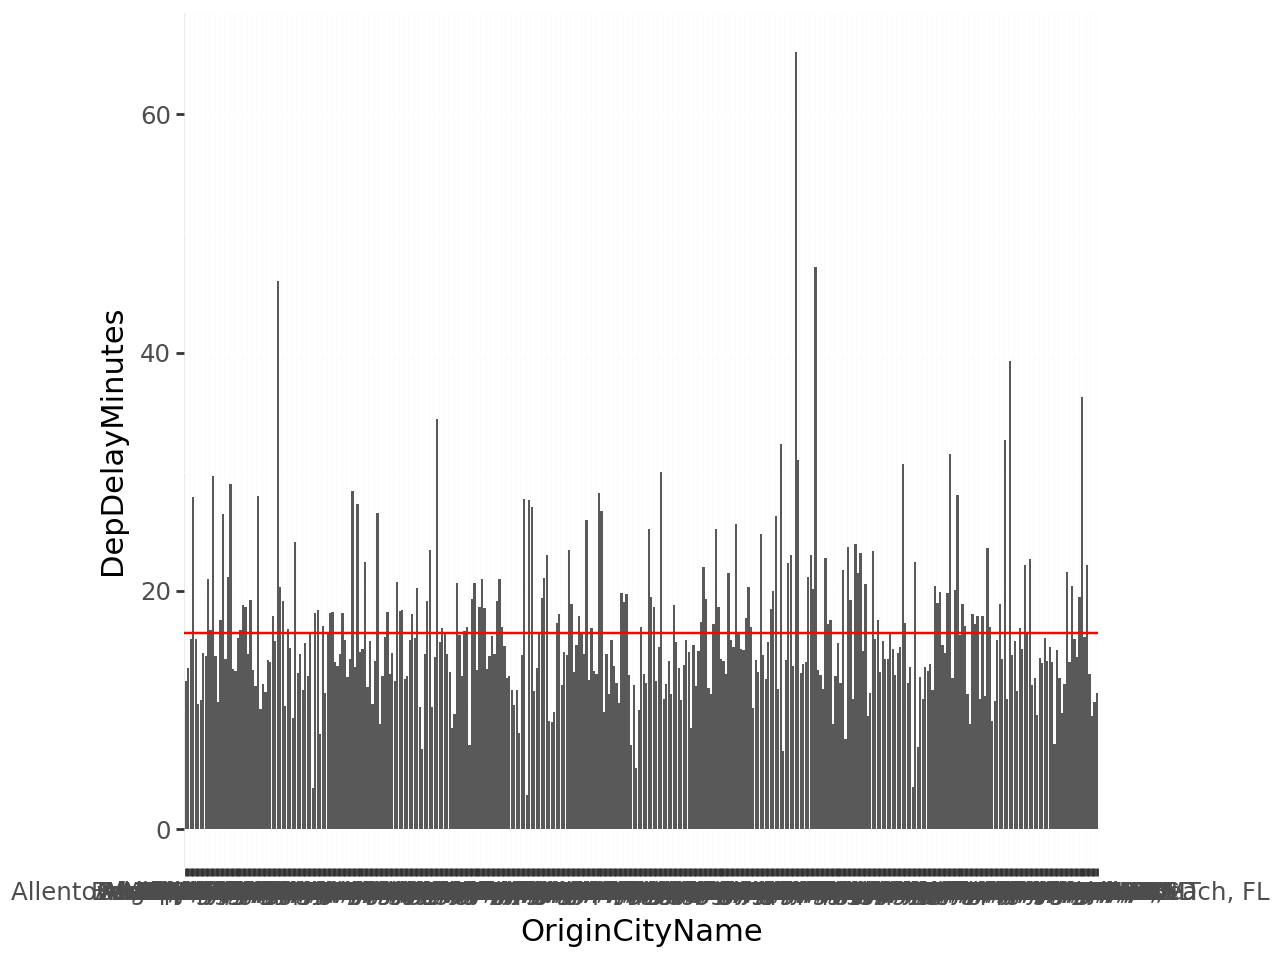

In [21]:
#average delay by origin city
avg_delay_by_origin_city = df.groupby("OriginCityName")["DepDelayMinutes"].mean().reset_index()

ggplot(avg_delay_by_origin_city, aes(x = 'OriginCityName', y = 'DepDelayMinutes')) + geom_col() + geom_hline(yintercept=avg_delay_by_origin_city["DepDelayMinutes"].mean(), color="Red")

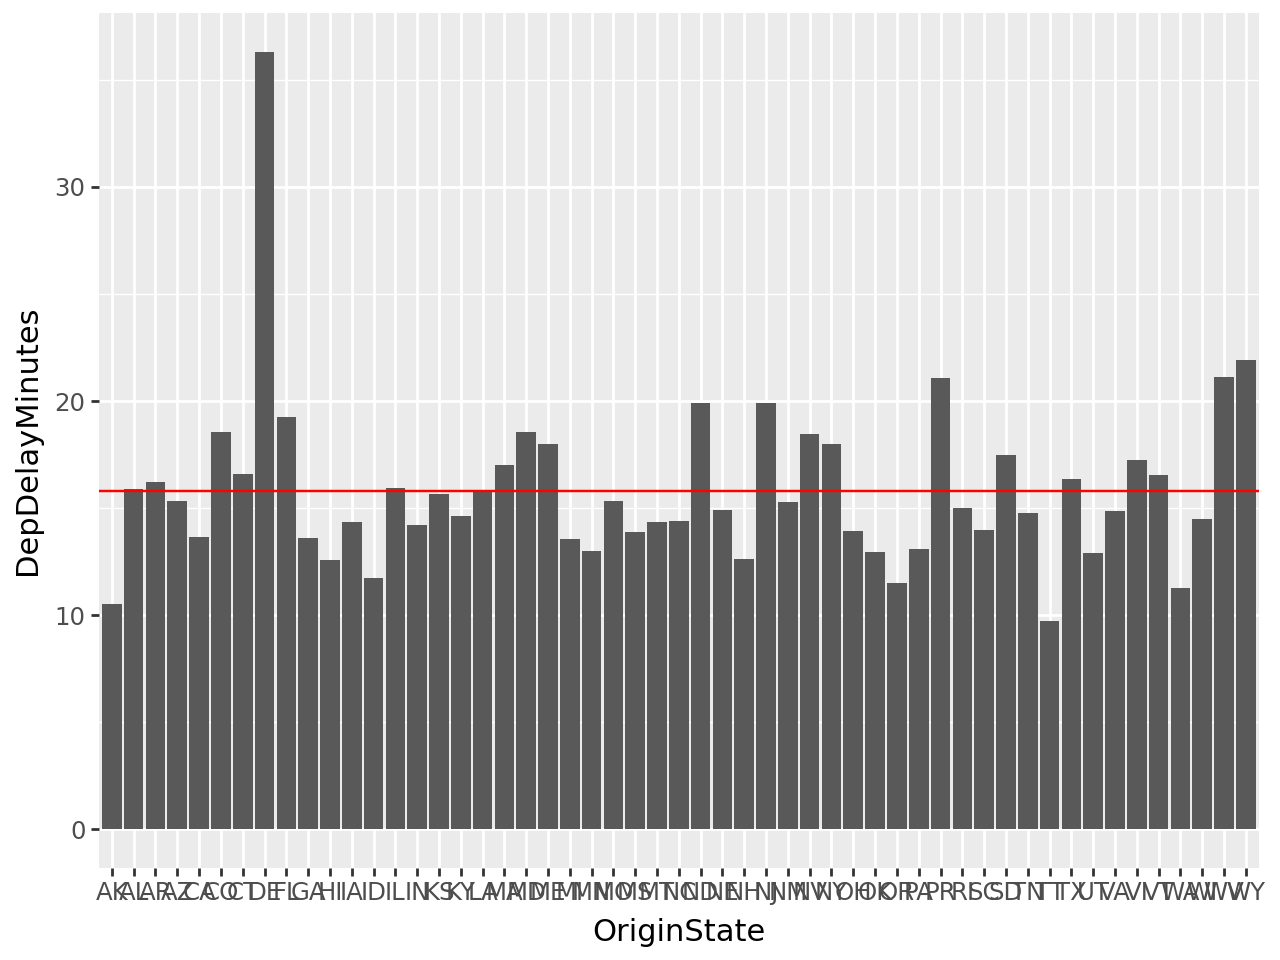

In [5]:
#average delay by origin state
avg_delay_by_origin_state = df.groupby("OriginState")["DepDelayMinutes"].mean().reset_index()

ggplot(avg_delay_by_origin_state, aes(x = 'OriginState', y = 'DepDelayMinutes')) + geom_col() + geom_hline(yintercept=avg_delay_by_origin_state["DepDelayMinutes"].mean(), color="Red")

#Delaware is the state with the highest average delay (36.31 mins)

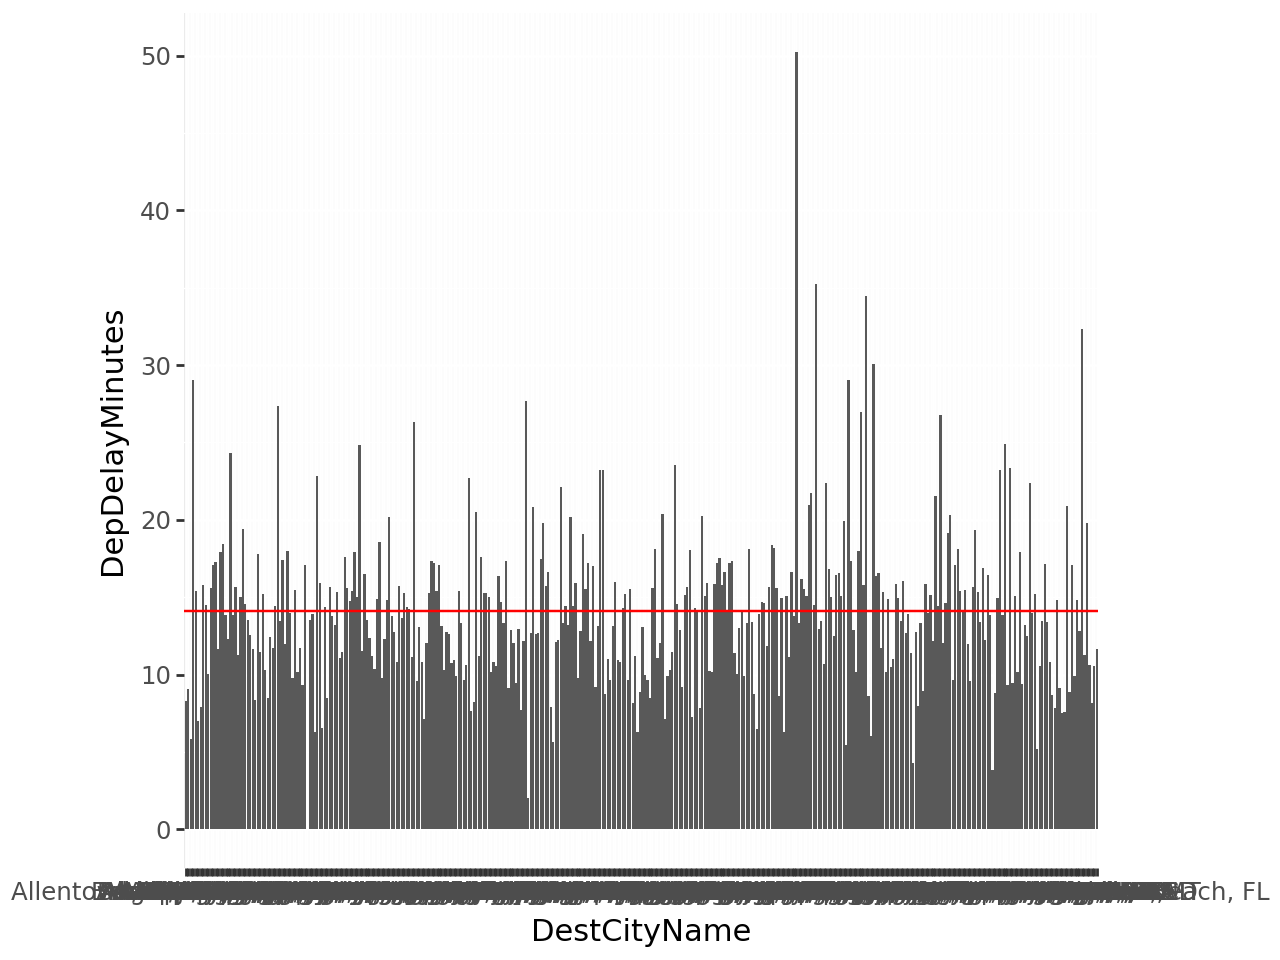

In [4]:
#average delay by origin city
avg_delay_by_dest_city = df.groupby("DestCityName")["DepDelayMinutes"].mean().reset_index()

ggplot(avg_delay_by_dest_city, aes(x = 'DestCityName', y = 'DepDelayMinutes')) + geom_col() + geom_hline(yintercept=avg_delay_by_dest_city["DepDelayMinutes"].mean(), color="Red")

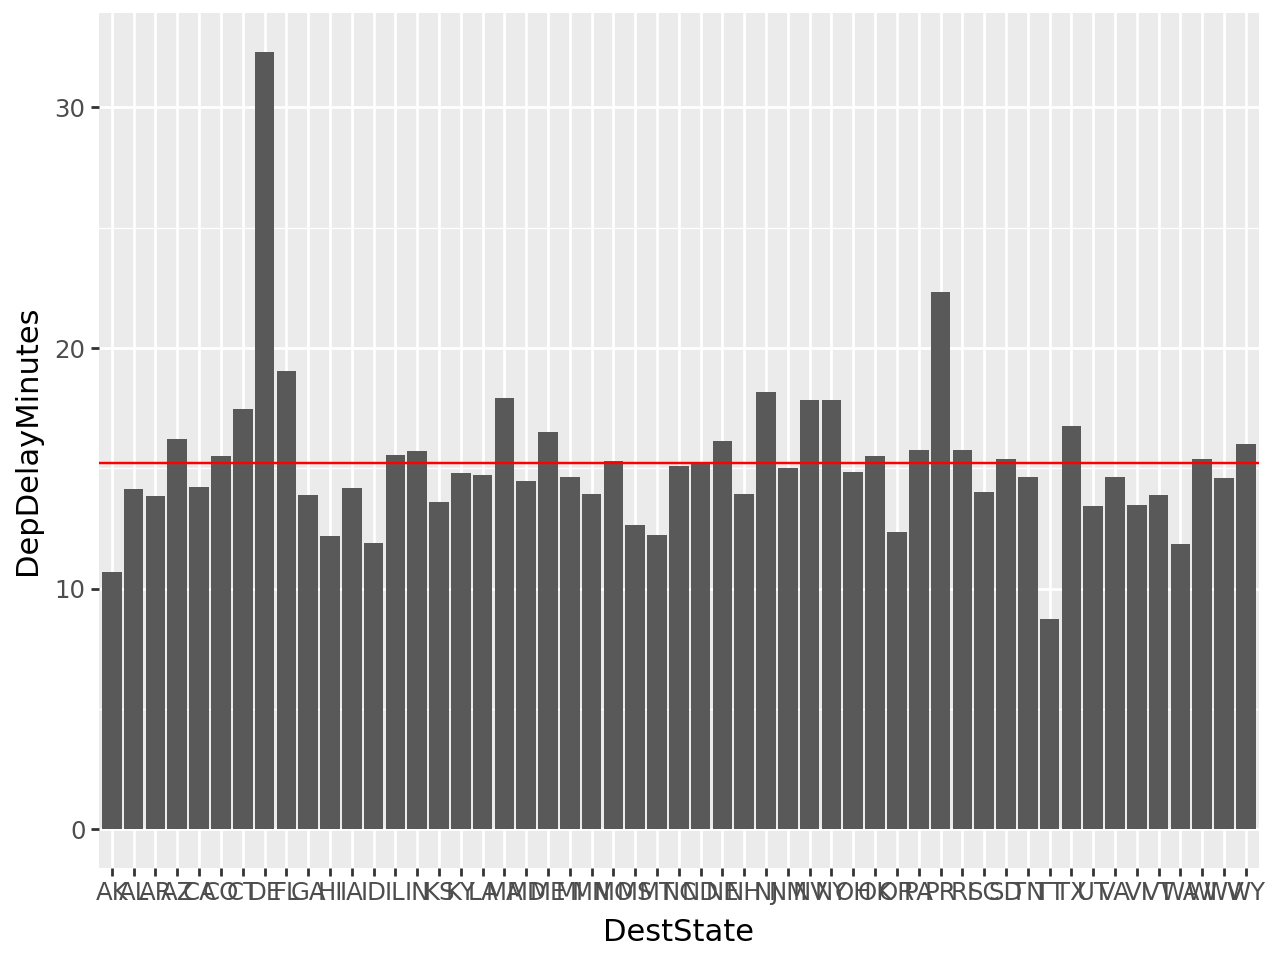

In [10]:
#average delay by dest state
avg_delay_by_dest_state = df.groupby("DestState")["DepDelayMinutes"].mean().reset_index()

ggplot(avg_delay_by_dest_state, aes(x = 'DestState', y = 'DepDelayMinutes')) + geom_col() + geom_hline(yintercept=avg_delay_by_dest_state["DepDelayMinutes"].mean(), color="Red")
